In [2]:
import pandas as pd
import numpy as np

# Dữ liệu mẫu từ notebook
data = {
    "Student_ID": [f"S{i:03d}" for i in range(1, 31)],
    "Course": ["Math", "Physics", "Chemistry"] * 10,
    "Score": [85, np.nan, 78, 92, 65, 88, np.nan, 75, 90, 70, 82, 85, 95, 68, 83, 77, 89, 72, 84, 91, 66, 87, np.nan, 93, 79, 86, 71, 94, 80, 88],
    "Attendance (%)": [90, 85, 70, 95, 60, np.nan, 80, 88, 92, 65, 75, np.nan, 98, np.nan, 90, 70, 95, 80, np.nan, 88, 60, 92, 75, 97, 85, 90, np.nan, 95, 70, 88],
    "Study_Hours": [5, 4, np.nan, 6, 3, 5, 4, 5, np.nan, 3, 4, 6, 7, 3, 5, 4, np.nan, 3, 5, 6, 2, 5, 4, np.nan, 3, 5, 4, 6, 3, 5],
    "Gender": ["Male", "Female", "Male", "Female", np.nan, "Male", "Female", "Male", "Female", "Male",
               "Female", "Male", "Female", "Male", np.nan, "Female", "Male", "Female", "Male", "Female",
               np.nan, "Male", "Female", "Male", "Female", "Male", "Female", np.nan , "Male", "Female"],
    "Campus": ["Campus_A", "Campus_B", "Campus_A", "Campus_C", "Campus_B", "Campus_A", "Campus_C", "Campus_B",
               "Campus_A", "Campus_C", "Campus_B", "Campus_A", "Campus_C", "Campus_B", "Campus_A", "Campus_C",
               "Campus_B", "Campus_A", "Campus_C", "Campus_B", "Campus_A", "Campus_C", "Campus_B", "Campus_A",
               "Campus_C", "Campus_B", "Campus_A", "Campus_C", "Campus_B", "Campus_A"]
}

# Chuyển danh sách thành mảng numpy để xử lý thiếu dữ liệu
data['Score'] = np.array(data['Score'])
#data['Attendance'] = np.array(data['Attendance'])
data['Study_Hours'] = np.array(data['Study_Hours'])
data['Gender'] = np.array(data['Gender'])


# Tạo DataFrame
df = pd.DataFrame(data)

# Lưu thành file CSV
df.to_csv('customer_data.csv', index=False)
print(df.head(50))


   Student_ID     Course  Score  Attendance (%)  Study_Hours  Gender    Campus
0        S001       Math   85.0            90.0          5.0    Male  Campus_A
1        S002    Physics    NaN            85.0          4.0  Female  Campus_B
2        S003  Chemistry   78.0            70.0          NaN    Male  Campus_A
3        S004       Math   92.0            95.0          6.0  Female  Campus_C
4        S005    Physics   65.0            60.0          3.0     nan  Campus_B
5        S006  Chemistry   88.0             NaN          5.0    Male  Campus_A
6        S007       Math    NaN            80.0          4.0  Female  Campus_C
7        S008    Physics   75.0            88.0          5.0    Male  Campus_B
8        S009  Chemistry   90.0            92.0          NaN  Female  Campus_A
9        S010       Math   70.0            65.0          3.0    Male  Campus_C
10       S011    Physics   82.0            75.0          4.0  Female  Campus_B
11       S012  Chemistry   85.0             NaN     

In [3]:
#Tính tỉ lệ phần trăm gtri thiếu từng cột
df.isnull().mean() * 100


Student_ID         0.000000
Course             0.000000
Score             10.000000
Attendance (%)    16.666667
Study_Hours       13.333333
Gender             0.000000
Campus             0.000000
dtype: float64

# Quy trình thu thập dữ liệu cụ thể cho trường học để giảm thiểu dữ liệu thiếu trong tương lai
Điểm số (Score): Giáo viên cần nhập điểm ngay sau khi chấm bài để tránh quên.

Tỷ lệ chuyên cần (Attendance %): Sử dụng hệ thống điểm danh điện tử hoặc ứng dụng để ghi lại dữ liệu theo thời gian thực.

Thời gian học (Study_Hours): Thu thập từ khảo sát định kỳ hoặc tích hợp với ứng dụng quản lý học tập.
# Tại sao quy trình này phù hợp với từng môn học
Toán (Math): Cần thu thập đầy đủ điểm số và thời gian học để đánh giá năng lực giải bài tập.

Vật lý (Physics): Dữ liệu chuyên cần quan trọng vì môn học có thí nghiệm thực hành.

Hóa học (Chemistry): Dữ liệu điểm số và thực hành phòng thí nghiệm cần lưu trữ chính xác để đánh giá kiến thức thực tiễn.



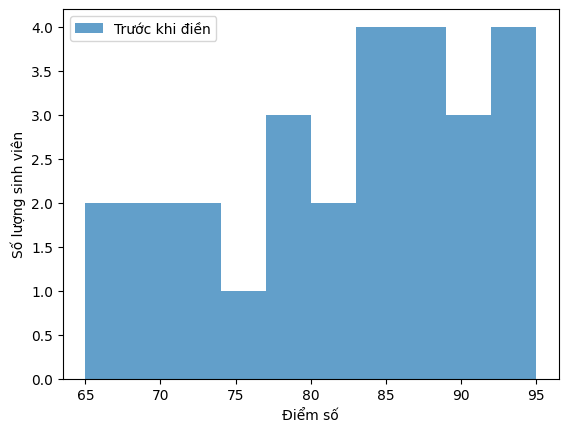

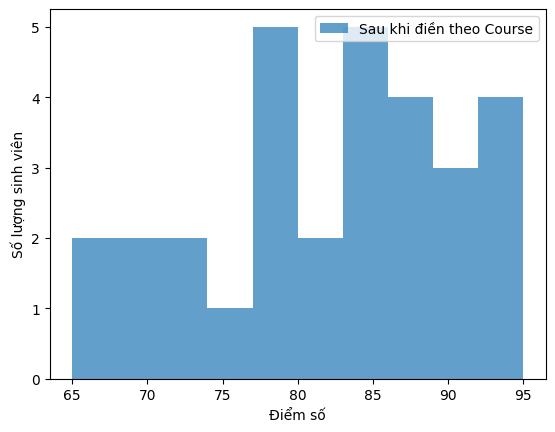

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.hist(df["Score"].dropna(), bins=10, alpha=0.7, label="Trước khi điền")
plt.xlabel("Điểm số")
plt.ylabel("Số lượng sinh viên")
plt.legend()
plt.show()

df["Score"] = df["Score"].fillna(df.groupby("Course")["Score"].transform("mean"))

plt.hist(df["Score"], bins=10, alpha=0.7, label="Sau khi điền theo Course")
plt.xlabel("Điểm số")
plt.ylabel("Số lượng sinh viên")
plt.legend()
plt.show()

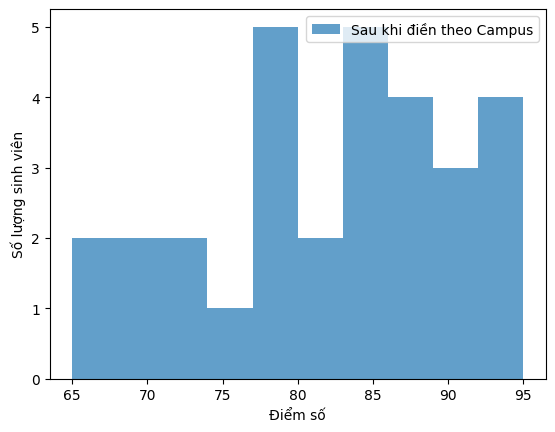

In [5]:
# Điền giá trị thiếu theo trung bình của từng Campus và Course
df["Score"] = df["Score"].fillna(df.groupby(["Course", "Campus"])["Score"].transform("mean"))

plt.hist(df["Score"], bins=10, alpha=0.7, label="Sau khi điền theo Campus")
plt.xlabel("Điểm số")
plt.ylabel("Số lượng sinh viên")
plt.legend()
plt.show()


# Tại sao điền theo Campus tốt hơn
Trung bình của từng môn (Course) chỉ phản ánh mức điểm chung của toàn bộ sinh viên trong môn học, không tính đến sự khác biệt giữa các cơ sở học tập.

Trung bình theo Campus và Course giúp phản ánh đặc điểm học tập của từng cơ sở, vì mỗi trường có thể có chất lượng giảng dạy, điều kiện học tập và mức độ khó khác nhau.

In [6]:
study_hours_std = np.nanstd(df['Study_Hours'])
print(f"Độ lệch chuẩn của Study_Hours là: {study_hours_std:.2f}")

Độ lệch chuẩn của Study_Hours là: 1.21


# Đề xuất chính sách khuyến khích học tập
Dựa trên độ lệch chuẩn của số giờ học, chúng ta thấy có sự phân tán nhất định trong thời gian học tập của sinh viên.
Một chính sách tiềm năng là triển khai các buổi hội thảo hoặc tài liệu hướng dẫn về kỹ năng quản lý thời gian và lập kế hoạch học tập hiệu quả.
Chính sách này có thể tập trung vào những sinh viên có số giờ học thấp hơn mức trung bình, nhằm giúp họ tối ưu hóa thời gian học tập.

# Giải thích tại sao chính sách này có thể cải thiện điểm số tổng thể
Giải thích tại sao chính sách này có thể cải thiện điểm số tổng thể
1. **Tăng cường hiệu quả học tập:** Khi sinh viên học tập có kế hoạch và quản lý thời gian tốt hơn, họ có thể sử dụng thời gian học tập một cách hiệu quả hơn, tiếp thu kiến thức sâu hơn trong cùng một khoảng thời gian.

2. **Giảm căng thẳng và áp lực:** Việc có một lịch trình học tập rõ ràng và khả năng kiểm soát thời gian có thể giúp giảm bớt căng thẳng và áp lực cho sinh viên, tạo điều kiện tâm lý tốt hơn cho việc học tập.

3. **Cải thiện sự chuẩn bị:** Quản lý thời gian tốt giúp sinh viên có đủ thời gian để chuẩn bị cho các bài kiểm tra và bài tập, dẫn đến kết quả tốt hơn.

4. **Phân bổ thời gian hợp lý:** Chính sách này có thể khuyến khích sinh viên phân bổ thời gian học tập một cách cân đối cho các môn học khác nhau, tránh tình trạng tập trung quá nhiều vào một môn mà bỏ bê các môn khác.

In [7]:
df['Study_Hours'].median()


np.float64(4.5)

In [8]:
df['Study_Hours'].mean()

np.float64(4.423076923076923)

# Phân tích thêm về trung vị và giá trị trung bình
Giá trị trung vị (median) cho thấy giá trị trung tâm của số giờ học, trong khi giá trị trung bình (mean) cho thấy số giờ học trung bình của tất cả sinh viên.

# So sánh độ lệch chuẩn với trung vị và giá trị trung bình giúp chúng ta hiểu rõ hơn về mức độ phân tán của dữ liệu so với các giá trị trung tâm.
Nếu độ lệch chuẩn lớn so với trung vị và giá trị trung bình, điều đó có nghĩa là có sự khác biệt lớn giữa số giờ học của các sinh viên khác nhau.

Chính sách khuyến khích học tập nên xem xét cả những sinh viên có số giờ học thấp hơn trung vị để đảm bảo hỗ trợ toàn diện.

In [9]:
df.groupby('Campus')[['Attendance (%)', 'Score']].corr().unstack().iloc[:, 1]


Campus
Campus_A    0.899397
Campus_B    0.748116
Campus_C    0.938569
Name: (Attendance (%), Score), dtype: float64

# Đề xuất chiến lược quản lý điểm danh:

Chúng ta lặp qua từng Campus và hệ số tương quan tương ứng.

Dựa trên giá trị của hệ số tương quan, chúng ta đề xuất các chiến lược quản lý điểm danh khác nhau:
+Tương quan dương mạnh (corr > 0.5): Điểm danh có vẻ có ảnh hưởng lớn đến điểm số. Chiến lược tập trung vào việc duy trì và khuyến khích điểm danh cao.

+Tương quan dương trung bình (0.2 <= corr <= 0.5): Điểm danh có vai trò nhất định, nhưng các yếu tố khác cũng quan trọng. Chiến lược cần linh hoạt hơn và nghiên cứu thêm các yếu tố khác.

+Tương quan yếu hoặc không có (corr < 0.2): Điểm danh có thể không phải là yếu tố quyết định đến điểm số. Chiến lược nên tập trung vào các yếu tố khác quan trọng hơn.

Không xác định: Trường hợp không đủ dữ liệu hoặc tương quan không rõ ràng.

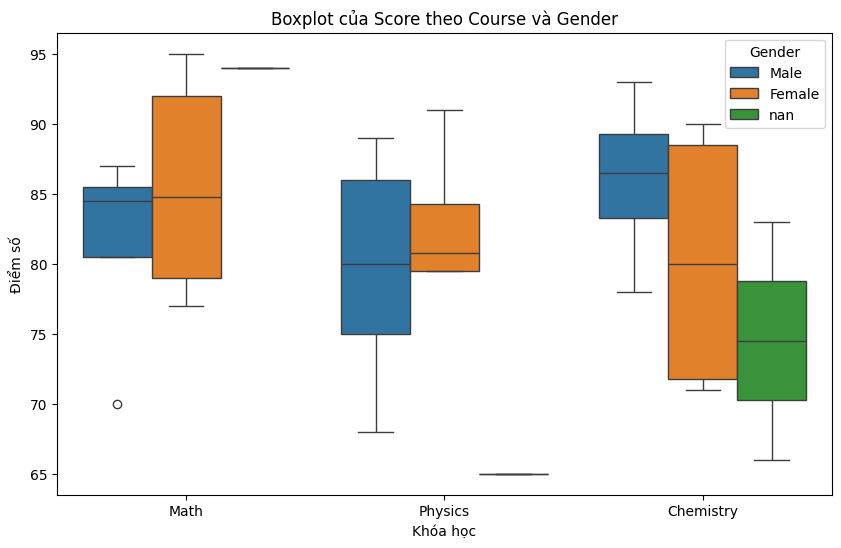


Outliers được xác định (theo IQR) cho từng nhóm Course và Gender:
Course: Math, Gender: Male, Outliers: ['S010']


In [10]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.figure(figsize=(10, 6))
sns.boxplot(x='Course', y='Score', hue='Gender', data=df)
plt.title('Boxplot của Score theo Course và Gender')
plt.xlabel('Khóa học')
plt.ylabel('Điểm số')
plt.show()

def identify_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers.index

outliers_by_group = {}
for course in df['Course'].unique():
    for gender in df['Gender'].unique():
        group = df[(df['Course'] == course) & (df['Gender'] == gender)]['Score'].dropna()
        if not group.empty:
            outlier_indices = identify_outliers_iqr(group)
            if not outlier_indices.empty:
                outliers_by_group[(course, gender)] = df.loc[outlier_indices]['Student_ID'].tolist()

print("\nOutliers được xác định (theo IQR) cho từng nhóm Course và Gender:")
for group, student_ids in outliers_by_group.items():
    print(f"Course: {group[0]}, Gender: {group[1]}, Outliers: {student_ids}")

# Đề xuất kế hoạch hỗ trợ cá nhân
Sinh viên có điểm số thấp hơn: Đề xuất hỗ trợ học tập cá nhân, xác định khó khăn cụ thể, cung cấp tài liệu bổ sung và theo dõi tiến độ thường xuyên.

Sinh viên có điểm số cao hơn: Đề xuất cơ hội học tập nâng cao, khuyến khích chia sẻ kiến thức và phát triển kỹ năng nâng cao.

# Giải thích cách kế hoạch này nâng cao chất lượng giáo dục:

Phần cuối cùng giải thích các lợi ích của việc áp dụng kế hoạch hỗ trợ cá nhân cho sinh viên outlier trong việc nâng cao chất lượng giáo dục, bao gồm:

-Cá nhân hóa học tập.
-Phát hiện sớm vấn đề.
-Hỗ trợ kịp thời và phù hợp.
-Tối ưu hóa tiềm năng.
-Cải thiện kết quả học tập chung.
-Tạo môi trường học tập toàn diện.
-Tăng cường sự gắn kết giữa sinh viên và giảng viên.

In [11]:
df["Efficiency"] = df["Score"] / df["Study_Hours"]

In [12]:
df.loc[df["Efficiency"].idxmax()]

Student_ID             S021
Course            Chemistry
Score                  66.0
Attendance (%)         60.0
Study_Hours             2.0
Gender                  nan
Campus             Campus_A
Efficiency             33.0
Name: 20, dtype: object

# Đề xuất phần thưởng hoặc học bổng
Học bổng "Siêu Hiệu Quả": Sinh viên có Efficiency cao nhất sẽ được học bổng 50% - 100% học phí hoặc một khoản hỗ trợ tài chính.

Phần thưởng đặc biệt: Laptop, sách chuyên ngành hoặc khoá học nâng cao để tiếp tục phát triển khả năng tự học hiệu quả.
# Tác động đến động lực học tập
Khuyến khích sinh viên học tập thông minh hơn: Thay vì chỉ dành nhiều thời gian học, sinh viên sẽ tìm cách học tập hiệu quả hơn.

Tạo động lực cho các sinh viên khác: Những sinh viên chưa có Efficiency cao có thể xem đây là mục tiêu để cải thiện phương pháp học của mình.

Cải thiện kỹ năng quản lý thời gian: Sinh viên sẽ học cách cân bằng thời gian học và nghỉ ngơi để tối ưu hóa kết quả học tập.

In [13]:
df.groupby("Course")["Gender"].apply(lambda x: (x == "Female").mean() * 100)


Course
Chemistry    40.0
Math         50.0
Physics      40.0
Name: Gender, dtype: float64

# Đề xuất chính sách cân bằng giới tính
Chính sách đề xuất: Học bổng và khuyến khích sinh viên nữ theo học các môn ít nữ
Học bổng "Cân Bằng Giáo Dục": Cung cấp học bổng cho sinh viên nữ trong các môn có tỷ lệ nữ thấp để khuyến khích sự tham gia.

Tạo câu lạc bộ hoặc nhóm hỗ trợ: Để giúp sinh viên nữ có môi trường học tập thân thiện và động viên họ phát triển.

Mời giảng viên nữ làm cố vấn: Để tạo hình mẫu (role model) cho sinh viên nữ và khuyến khích họ tham gia nhiều hơn vào các môn học có tỷ lệ nữ thấp.

# Tác động đến môi trường học tập
Tăng sự đa dạng và cân bằng giới tính trong các môn học.

Giảm định kiến về giới trong giáo dục, đặc biệt là với các môn học STEM (Math, Physics, Chemistry).

Tạo môi trường học tập công bằng hơn, giúp tất cả sinh viên cảm thấy thoải mái và có cơ hội phát triển ngang nhau.



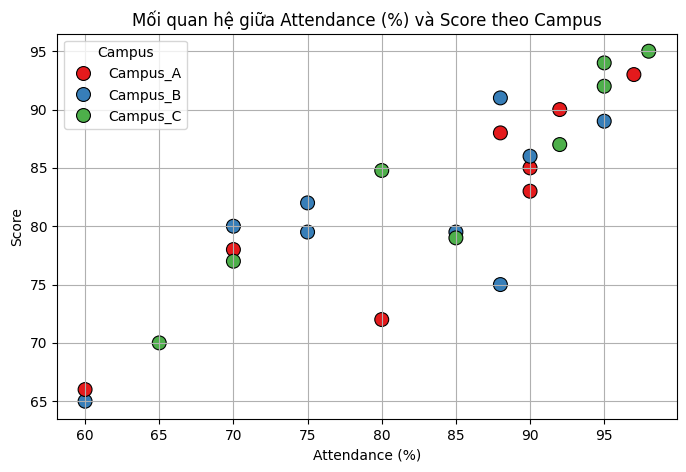

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Attendance (%)", y="Score", hue="Campus", palette="Set1", s=100, edgecolor="black")

plt.title("Mối quan hệ giữa Attendance (%) và Score theo Campus")
plt.xlabel("Attendance (%)")
plt.ylabel("Score")
plt.legend(title="Campus")
plt.grid(True)
plt.show()

# Tác động của kế hoạch này đến tối ưu hóa kết quả học tập
Tăng ý thức điểm danh của sinh viên → Giúp họ tham gia lớp học thường xuyên hơn.

Cải thiện điểm số nếu có mối tương quan giữa điểm danh và thành tích học tập.

Cung cấp dữ liệu trực quan cho nhà trường để điều chỉnh chính sách giáo dục phù hợp với từng Campus.

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_28836\4160320165.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_scores.index, y=avg_scores.values, palette="viridis")


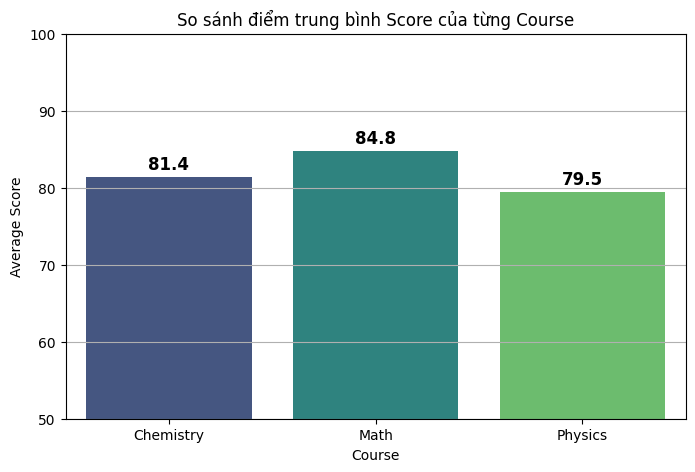

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

avg_scores = df.groupby("Course")["Score"].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_scores.index, y=avg_scores.values, palette="viridis")


plt.title("So sánh điểm trung bình Score của từng Course")
plt.xlabel("Course")
plt.ylabel("Average Score")
plt.ylim(50, 100)
plt.grid(axis="y")

for i, score in enumerate(avg_scores):
    plt.text(i, score + 1, f"{score:.1f}", ha="center", fontsize=12, fontweight="bold")
plt.show()

# Tác động của chiến lược cải thiện
Cải thiện điểm số chung bằng cách áp dụng phương pháp giảng dạy phù hợp với từng môn.

Tăng động lực học tập khi sinh viên cảm thấy dễ hiểu và áp dụng kiến thức tốt hơn.

Hỗ trợ nhà trường điều chỉnh giáo trình để tối ưu hóa chất lượng đào tạo.

In [16]:
df[(df['Attendance (%)'] < 70) & (df['Score'] > 85)]

,Student_ID,Course,Score,Attendance (%),Study_Hours,Gender,Campus,Efficiency


# Đề xuất nghiên cứu nội bộ:

Để hiểu rõ hơn về những yếu tố giúp nhóm sinh viên này đạt điểm cao dù điểm danh thấp, một nghiên cứu nội bộ được đề xuất.

Các phương pháp nghiên cứu tiềm năng bao gồm:
-Phỏng vấn sâu: Thu thập thông tin chi tiết về cách học tập của sinh viên.
-Khảo sát: Thu thập dữ liệu định lượng từ một nhóm lớn hơn.
-Phân tích dữ liệu học tập: Tìm kiếm các mẫu trong dữ liệu hiện có.
Các khía cạnh cụ thể cần tìm hiểu trong nghiên cứu được liệt kê (kỹ năng tự học, sử dụng tài liệu, vai trò công nghệ, v.v.).
# Giải thích cách áp dụng kết quả cho toàn trường:

Kết quả của nghiên cứu có thể được sử dụng để cải thiện chất lượng giáo dục cho tất cả sinh viên thông qua các biện pháp sau:
-Xây dựng chương trình hỗ trợ kỹ năng tự học.
-Tối ưu hóa việc sử dụng tài liệu và nguồn lực học tập.
-Tích hợp công nghệ vào giảng dạy và học tập.
-Chia sẻ kinh nghiệm học tập hiệu quả.
-Cá nhân hóa trải nghiệm học tập.
-Đánh giá lại chính sách điểm danh.
-Hỗ trợ sinh viên có nguy cơ.

In [17]:
from scipy.stats import skew

score_skewness = skew(df['Score'].dropna())
print(f"Skewness của Score là: {score_skewness:.2f}")

Skewness của Score là: -0.41


# Đề xuất cách điều chỉnh cách tính điểm:

Dựa trên giá trị skewness, chúng ta đưa ra các đề xuất điều chỉnh cách tính điểm để phân bố công bằng hơn:
-Nếu skewness > 0.5 (lệch phải): Điều này cho thấy nhiều sinh viên đạt điểm cao. Các biện pháp có thể là tăng độ khó, xem xét lại thang điểm, đa dạng hóa phương pháp đánh giá.
-Nếu skewness < -0.5 (lệch trái): Điều này cho thấy nhiều sinh viên đạt điểm thấp. Các biện pháp có thể là đánh giá lại phương pháp giảng dạy, cung cấp hỗ trợ học tập, xem xét lại độ khó chương trình.
-Nếu skewness gần 0 (phân phối đối xứng): Hệ thống đánh giá hiện tại có vẻ cân bằng, nhưng vẫn cần theo dõi.
# Giải thích tác động đến đánh giá sinh viên:

Phần này giải thích tác động của việc điều chỉnh hệ thống đánh giá (dựa trên skewness) đến việc đánh giá năng lực của sinh viên:
-Giảm lệch phải: Giúp phân biệt rõ hơn giữa các sinh viên giỏi.
-Giảm lệch trái: Giúp nhận diện và hỗ trợ sinh viên yếu kịp thời.
-Phân phối đối xứng: Hệ thống đánh giá có thể đang phản ánh khá chính xác năng lực của đa số sinh viên.

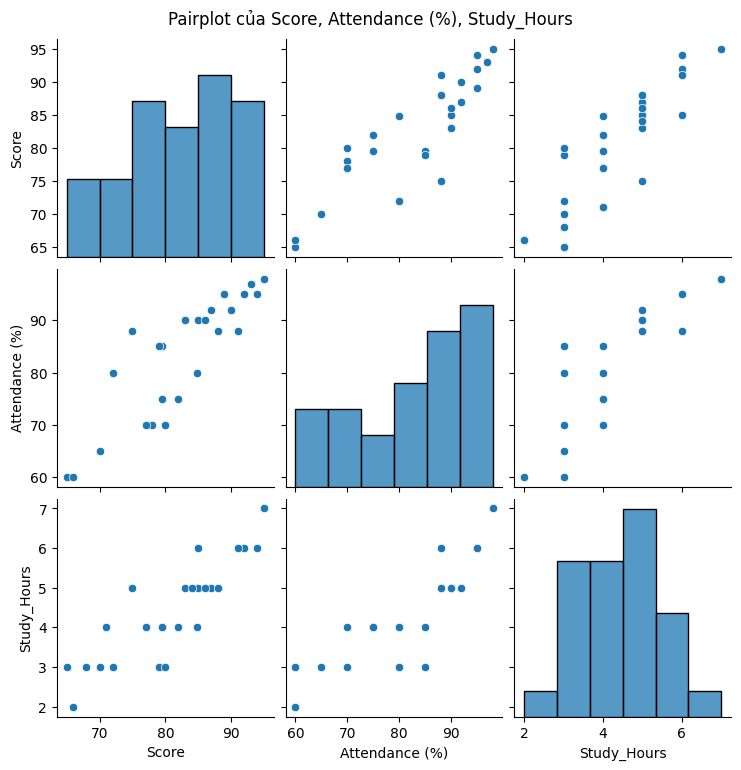

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df[['Score', 'Attendance (%)', 'Study_Hours']])
plt.suptitle('Pairplot của Score, Attendance (%), Study_Hours', y=1.02)
plt.show()

# Đề xuất mô hình đánh giá kết quả học tập mới:

Dựa trên những quan sát từ pairplot (tương quan giữa các biến), một mô hình đánh giá kết quả học tập mới được đề xuất.
Mô hình này nên đa dạng hóa các yếu tố đánh giá, không chỉ dựa vào điểm số mà còn xem xét:
-Điểm số bài kiểm tra và bài tập.
-Tỷ lệ điểm danh.
-Thời gian tự học.
-Đánh giá định kỳ và thường xuyên.
-Đánh giá kỹ năng mềm.
-Phản hồi từ giảng viên và tự đánh giá của sinh viên.
# Giải thích tại sao mô hình này tốt hơn cách tính hiện tại:

Phần này giải thích những ưu điểm của mô hình đánh giá mới so với cách tính điểm truyền thống (giả định chủ yếu dựa vào điểm số):
-Đánh giá toàn diện hơn.
-Khuyến khích sự tham gia và nỗ lực.
-Phản ánh năng lực đa dạng.
-Hỗ trợ sự phát triển cá nhân.
-Giảm áp lực thi cử.
-Chuẩn bị tốt hơn cho tương lai.
-Phản ánh chính xác hơn về quá trình học tập.

In [19]:

campus_score_above_80 = df.groupby('Campus')['Score'].apply(lambda x: (x > 80).sum() / x.count()).fillna(0)


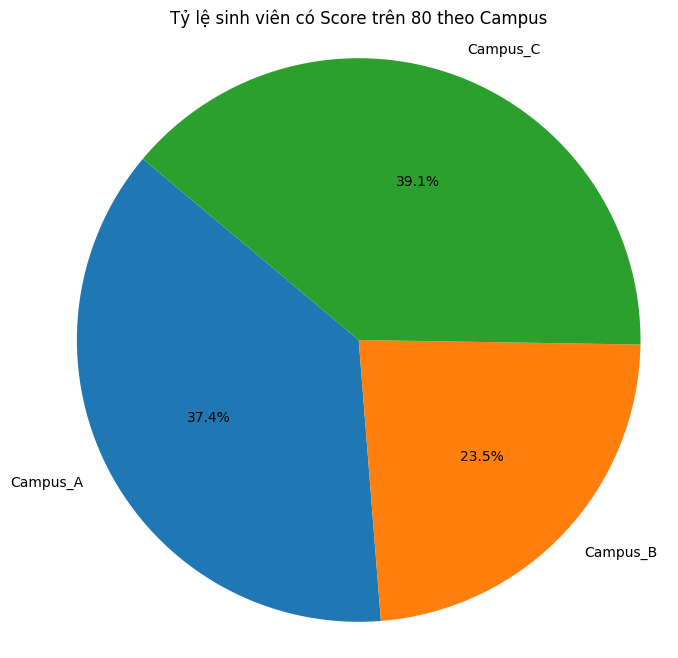

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(campus_score_above_80, labels=campus_score_above_80.index, autopct='%1.1f%%', startangle=140)
plt.title('Tỷ lệ sinh viên có Score trên 80 theo Campus')
plt.axis('equal')  
plt.show()


# Đề xuất chiến lược khen thưởng:

Chúng ta lặp qua từng Campus và tỷ lệ sinh viên có điểm trên 80.
Dựa trên tỷ lệ này, chúng ta đề xuất các chiến lược khen thưởng khác nhau:
Tỷ lệ cao (> 0.5): Tập trung duy trì và nhân rộng thành công, khen thưởng mang tính cộng đồng và nâng cao.
Tỷ lệ trung bình (0.3 - 0.5): Khuyến khích sự tiến bộ và bứt phá, khen thưởng sự cải thiện và nỗ lực.
Tỷ lệ thấp (< 0.3): Tạo động lực ban đầu, khen thưởng những nỗ lực nhỏ và sự tham gia.
# Giải thích tác động đến tinh thần học tập:

Phần này giải thích tại sao việc áp dụng các chiến lược khen thưởng khác nhau cho từng Campus có thể tác động tích cực đến tinh thần học tập của sinh viên, bằng cách tạo động lực phù hợp với tình hình thực tế của từng khu học xá và công nhận những nỗ lực ở mọi cấp độ.

In [21]:
def find_score_outliers(df, threshold=2):
    """
    Xác định sinh viên có điểm số nằm ngoài phạm vi threshold độ lệch chuẩn so với giá trị trung bình.

    Args:
        df (pd.DataFrame): DataFrame chứa dữ liệu sinh viên với cột 'Score'.
        threshold (float): Số độ lệch chuẩn làm ngưỡng.

    Returns:
        pd.DataFrame: DataFrame chứa thông tin của các sinh viên có điểm số là outlier.
    """
    mean_score = df['Score'].mean()
    std_score = df['Score'].std()
    upper_bound = mean_score + threshold * std_score
    lower_bound = mean_score - threshold * std_score
    outliers = df[(df['Score'] > upper_bound) | (df['Score'] < lower_bound)].dropna(subset=['Score'])
    return outliers

score_outliers = find_score_outliers(df)
print("Các sinh viên có Score ngoài 2 độ lệch chuẩn:\n", score_outliers)

Các sinh viên có Score ngoài 2 độ lệch chuẩn:
 Empty DataFrame
Columns: [Student_ID, Course, Score, Attendance (%), Study_Hours, Gender, Campus, Efficiency]
Index: []


# Đề xuất quy trình đánh giá lại điểm số:

Một quy trình gồm 5 bước được đề xuất để xem xét lại điểm số của những sinh viên có điểm số nằm ngoài 2 độ lệch chuẩn:
Bước 1: Rà soát dữ liệu đầu vào: Kiểm tra tính chính xác của dữ liệu gốc và các yếu tố khách quan.
Bước 2: Phân tích hiệu suất toàn diện: Xem xét điểm số ở các đánh giá khác, sự tham gia trên lớp, v.v.
Bước 3: Thu thập thông tin từ giảng viên: Trao đổi với giảng viên để hiểu rõ hơn về quá trình học tập của sinh viên.
Bước 4: (Tùy chọn) Phỏng vấn sinh viên: Tìm hiểu thêm thông tin từ chính sinh viên.
Bước 5: Đưa ra quyết định: Hội đồng chuyên môn xem xét và đưa ra quyết định cuối cùng dựa trên các thông tin thu thập được.
# Giải thích cách quy trình này tránh được thiên vị trong giáo dục:

Quy trình đánh giá lại được thiết kế để giảm thiểu thiên vị bằng cách:
-Xem xét đa chiều: Không chỉ dựa vào một con số điểm.
-Tính minh bạch: Các bước rõ ràng và được công khai.
-Sự tham gia của nhiều bên: Thu thập thông tin từ nhiều nguồn.
-Cơ chế rà soát: Kiểm tra dữ liệu đầu vào.
-Quyết định dựa trên bằng chứng: Không dựa trên cảm tính.
-Đảm bảo cơ hội công bằng: Xem xét kỹ lưỡng các trường hợp bất thường.
-Tăng cường tính tin cậy: Tạo sự tin tưởng vào hệ thống đánh giá.